In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [41]:
with open('data/data.pickle', 'rb') as handle:
    position_data = pickle.load(handle)

planned_positions = position_data["planned"]
measured_positions = position_data["measured"]
time = position_data["time"]

In [42]:
planned_positions_array = np.concatenate(planned_positions, axis=1)
measured_positions_array = np.concatenate(measured_positions, axis=1)

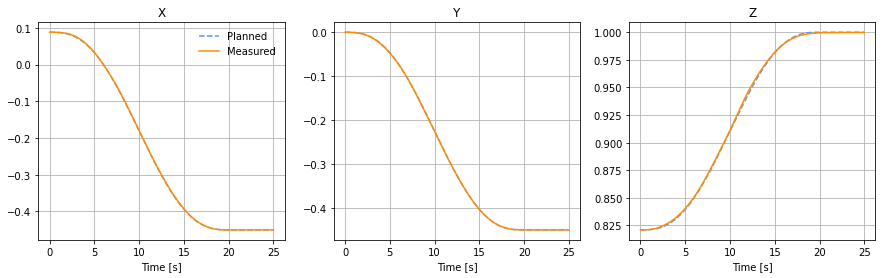

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
n = 6000
titles = ["X", "Y", "Z"]

for i in range(3):
    axs[i].plot(time[:n], planned_positions_array[i, :n], color="cornflowerblue", linestyle="dashed", label="Planned")
    axs[i].plot(time[:n], measured_positions_array[i, :n], color="darkorange", label="Measured")
    axs[i].grid()
    axs[i].set_xlabel("Time [s]")
    axs[i].set_title(titles[i])

axs[0].legend(frameon=False)

plt.savefig("imgs/tracking.png")